# railファイル確認用

In [1]:
import boto3
import os
import shelve
import copy
import streamlit as st
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import pandas as pd
import numpy as np
import datetime
# import src.utilsST_01 as utlst
import src.helpers as helpers
import src.visualize as vis
from src.config import appProperties
from src.trolley import trolley
from src.similar_pixel import pixel

config = appProperties('config.yml')

2023-05-25 06:10:28.218 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


In [8]:
dir_area = "Chuo_01_Tokyo-St_up_20230201_knight"
# dir_area = "Chuo_02_Tokyo-Kanda_up_20230201_knight"
camera_num = "HD11"
target_dir = config.image_dir + "/" + dir_area + "/" + camera_num
outpath = config.output_dir + "/" + dir_area + "/" + camera_num

base_images = helpers.list_images(target_dir)

rail_fpath = outpath + "/rail.shelve"

with shelve.open(rail_fpath) as rail:
    rail_dict = copy.deepcopy(rail)

# rail = shelve.open(rail_fpath)

In [ ]:
keys = rail_dict.keys()
for i, key in enumerate(keys):
    print(f'{i}: {key}')

In [ ]:
keys = rail_dict[camera_num].keys()
for i, key in enumerate(keys):
    print(f'{i}: {key}')

In [ ]:
image_path = base_images[9]
image_path

In [ ]:
keys = rail_dict[camera_num][image_path].keys()
for i, key in enumerate(keys):
    print(f'{i}: {key}')

In [ ]:
keys = rail_dict[camera_num][image_path]["trolley1"].keys()
for i, key in enumerate(keys):
    print(f'{i}: {key}')

In [ ]:
image_path = base_images[1]
rail["HD11"][image_path]["trolley1"]["estimated_upper_edge"]

0> imgs/Chuo_01_Tokyo-St_up_20230201_knight/HD11/2022_0615_HD11_01_00022312.jpg
1> imgs/Chuo_01_Tokyo-St_up_20230201_knight/HD11/2022_0615_HD11_01_00022313.jpg
2> imgs/Chuo_01_Tokyo-St_up_20230201_knight/HD11/2022_0615_HD11_01_00022314.jpg
3> imgs/Chuo_01_Tokyo-St_up_20230201_knight/HD11/2022_0615_HD11_01_00022315.jpg
4> imgs/Chuo_01_Tokyo-St_up_20230201_knight/HD11/2022_0615_HD11_01_00022316.jpg
5> imgs/Chuo_01_Tokyo-St_up_20230201_knight/HD11/2022_0615_HD11_01_00022317.jpg
6> imgs/Chuo_01_Tokyo-St_up_20230201_knight/HD11/2022_0615_HD11_01_00022318.jpg
7> imgs/Chuo_01_Tokyo-St_up_20230201_knight/HD11/2022_0615_HD11_01_00022319.jpg
8> imgs/Chuo_01_Tokyo-St_up_20230201_knight/HD11/2022_0615_HD11_01_00022320.jpg
9> imgs/Chuo_01_Tokyo-St_up_20230201_knight/HD11/2022_0615_HD11_01_00022321.jpg
10> imgs/Chuo_01_Tokyo-St_up_20230201_knight/HD11/2022_0615_HD11_01_00022322.jpg
11> imgs/Chuo_01_Tokyo-St_up_20230201_knight/HD11/2022_0615_HD11_01_00022323.jpg
12> imgs/Chuo_01_Tokyo-St_up_20230201_

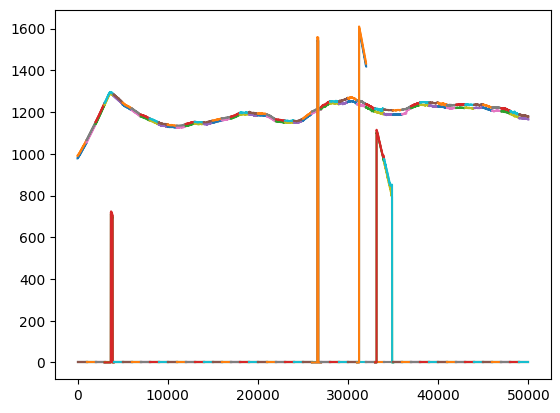

2023-05-25 07:02:57.639392 Process end :0:00:02.260500


In [9]:
'''
case1: xのみnp.array   -> 2023-05-24 00:44:31.574638 Process end :0:00:45.240699
case2: x,yをnp.array   -> 2023-05-24 02:24:05.555617 Process end :0:00:57.180313
case3: rail_dict化     -> 2023-05-24 04:58:30.819891 Process end :0:00:07.624567
case4: shelve.open追加 -> 2023-05-24 05:17:12.809013 Process end :0:00:03.504746
'''

dt01 = datetime.datetime.now()

img_num = 50

with shelve.open(rail_fpath) as rail:
    trolley_dict = copy.deepcopy(rail[camera_num])

for idx, image_path in enumerate(base_images):
    print(f"{idx}> {image_path}")
    x_values = np.array([n + 1000 * idx for n in trolley_dict[image_path][config.trolley_ids[0]]["ix"]])
    for trolley_id in config.trolley_ids:
        plt.plot(x_values, trolley_dict[image_path][trolley_id]["estimated_upper_edge"])
        plt.plot(x_values, trolley_dict[image_path][trolley_id]["estimated_lower_edge"])
    if idx >= img_num-1:
        print("break")
        break

plt.show()

dt02 = datetime.datetime.now()
prc_time = dt02 - dt01
print(str(datetime.datetime.now()) + f' Process end :{prc_time}')

In [10]:
for key in trolley_dict[base_images[0]]['trolley1'].keys():
    print(key)

ix
estimated_upper_edge
estimated_lower_edge
estimated_width
estimated_slope
brightness_center
brightness_mean
brightness_std
current_state
estimated_upper_edge_variance
estimated_lower_edge_variance
estimated_slope_variance
upper_boundary
lower_boundary


In [11]:
print("最後の検出結果")
for trolley_id in config.trolley_ids:
    print(f"trolley_id:{trolley_id}")
    print(f'estimated_upper_edge:{trolley_dict[image_path][trolley_id]["estimated_upper_edge"][999]}')
    print(f'estimated_lower_edge:{trolley_dict[image_path][trolley_id]["estimated_lower_edge"][999]}')
    print(f'brightness_std:{trolley_dict[image_path][trolley_id]["brightness_std"][999]}')
    print(f'brightness_center:{trolley_dict[image_path][trolley_id]["brightness_center"][999]}')

最後の検出結果
trolley_id:trolley1
estimated_upper_edge:1165
estimated_lower_edge:1178
brightness_std:40.11698454494794
brightness_center:255
trolley_id:trolley2
estimated_upper_edge:0
estimated_lower_edge:0
brightness_std:0.0
brightness_center:12
trolley_id:trolley3
estimated_upper_edge:0
estimated_lower_edge:0
brightness_std:0.0
brightness_center:12


# 結果画像の表示

In [ ]:
with shelve.open(rail_fpath) as rail:
    trolley_dict = copy.deepcopy(rail[camera_num])

idx = 0
image_path = base_images[idx]
img = Image.open(image_path)
print(f"{idx}> {image_path}")

x_values = np.array([n + 1000 * idx for n in trolley_dict[image_path][config.trolley_ids[0]]["ix"]])
for trolley_id in config.trolley_ids:
    plt.plot(x_values, trolley_dict[image_path][trolley_id]["estimated_upper_edge"])
    plt.plot(x_values, trolley_dict[image_path][trolley_id]["estimated_lower_edge"])


In [ ]:
# 画像とデータの読み込み
with shelve.open(rail_fpath) as rail:
    trolley_dict = copy.deepcopy(rail[camera_num])

idx = 0
image_path = base_images[idx]
img = Image.open(image_path)
print(f"{idx}> {image_path}")

# 画像をnumpy配列に変換
img_array = np.array(img)

# ランダムに1000画素を選択し、その平均輝度を背景の輝度とする
random_pixels = img_array[np.random.randint(0, img_array.shape[0], 1000), np.random.randint(0, img_array.shape[1], 1000)]
background_brightness = random_pixels.mean()

# データを描画
x_values = trolley_dict[image_path][config.trolley_ids[0]]["ix"]
for trolley_id in config.trolley_ids:
    upper_edge = trolley_dict[image_path][trolley_id]["estimated_upper_edge"]
    lower_edge = trolley_dict[image_path][trolley_id]["estimated_lower_edge"]
    for x, y1, y2 in zip(x_values, upper_edge, lower_edge):
        # estimated_upper_edgeとestimated_lower_edgeが0でない場合のみ色を変更
        if y1 != 0:
            color_upper = [0, 255, 0] if background_brightness < 128 else [255, 0, 0]  # 緑または赤
            img_array[y1, x] = color_upper
        if y2 != 0:
            color_lower = [0, 255, 0] if background_brightness < 128 else [255, 0, 0]  # 緑または赤
            img_array[y2, x] = color_lower

# 変更後の画像を表示
display_img = Image.fromarray(img_array)
display_img

# 結果をCSV出力する